- Частные коэффициенты корреляции, проверить наличие статистической связи
- Множественный коэффициент корреляции
- Коэффициент детерминации.

Проверить: `Коэффициент детерминации` = `квадрату множественного коэффициента корреляции`.


In [1]:
data <- read.csv(file = "../Data/Uroshainost.scv", header = TRUE, dec = ",")

In [12]:
head(data)

,Y,X1,X2,X3,X4,X5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.7,1.59,0.26,2.05,0.32,0.14
2,8.4,0.34,0.28,0.46,0.59,0.66
3,19.0,2.53,0.31,2.46,0.30,0.31
4,9.9,4.63,0.40,6.44,0.43,0.59
5,9.6,2.16,0.26,2.16,0.39,0.16
6,8.6,2.16,0.30,2.69,0.32,0.17


In [3]:
model <- lm(data)

In [4]:
summary(model)


Call:
lm(formula = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4785 -1.3049 -0.5788  0.8404  7.2201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -5.195      9.184  -0.566   0.5806  
X1             3.171      1.798   1.763   0.0996 .
X2            53.622     36.323   1.476   0.1620  
X3            -2.886      1.609  -1.793   0.0945 .
X4             3.475      2.617   1.328   0.2055  
X5            -5.205      5.253  -0.991   0.3385  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.7 on 14 degrees of freedom
Multiple R-squared:  0.3566,	Adjusted R-squared:  0.1268 
F-statistic: 1.552 on 5 and 14 DF,  p-value: 0.237


,Y,X1,X2,X3,X4,X5
Y,1.0000000,0.3495011,0.33933737,0.28818325,0.30098909,0.2640633
X1,0.3495011,1.0000000,0.85425359,0.98407983,0.11044360,0.3410126
X2,0.3393374,0.8542536,1.00000000,0.87939879,0.02685241,0.4595917
X3,0.2881832,0.9840798,0.87939879,1.00000000,0.06220056,0.2961622
X4,0.3009891,0.1104436,0.02685241,0.06220056,1.00000000,0.5706292
X5,0.2640633,0.3410126,0.45959173,0.29616217,0.57062918,1.0000000


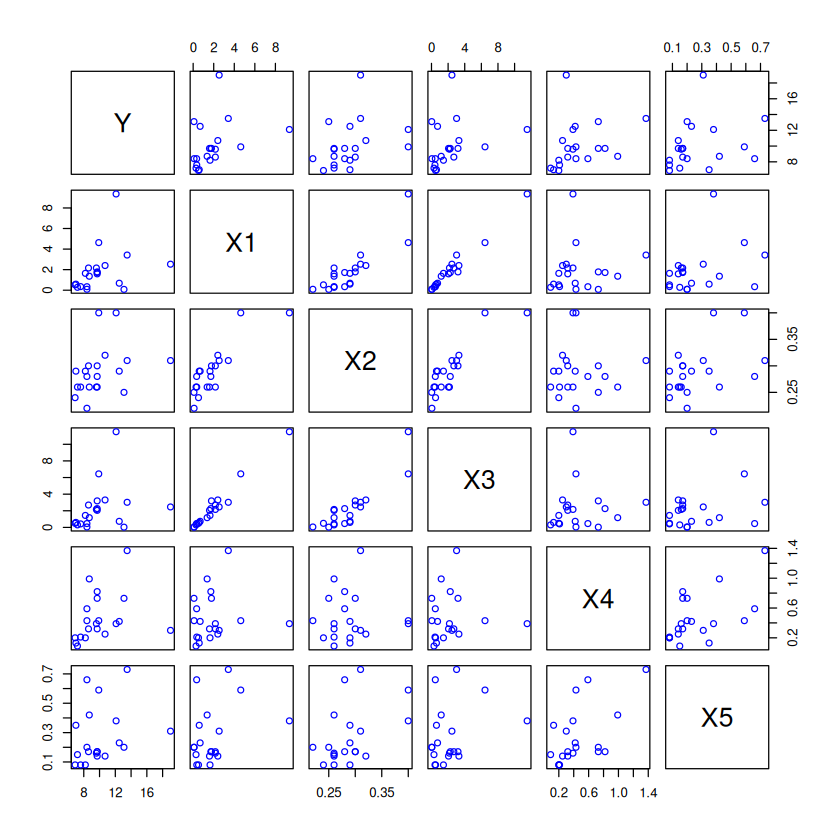

In [5]:
cor(data, method = c("pearson")) # Коэффицент корреляции Пирсона
pairs(data,col = "blue")

In [6]:
# Статистика стьдента
t <- sqrt(cor(data, method = c("pearson")) * (length(data[,1]) - length(data) - 1)) / sqrt(1 - cor(data)^2)
abs(t)
# Квантиль 95
qt(.975, length(data[,1]) - length(data) - 1)

# H0 отсуствие корреляции. 
# abs(t) < квантиль => H0

,Y,X1,X2,X3,X4,X5
Y,Inf,2.275024,2.2328146,2.0213109,2.0742842,1.920972
X1,2.275024,Inf,6.4103477,20.1248858,1.2056103,2.239762
X2,2.232815,6.410348,Inf,7.1019778,0.5910441,2.752207
X3,2.021311,20.124886,7.1019778,Inf,0.9009705,2.054331
X4,2.074284,1.205610,0.5910441,0.9009705,Inf,3.316619
X5,1.920972,2.239762,2.7522070,2.0543314,3.3166189,Inf


[1] 2.160369

In [7]:
solve(cor(data, method = c("pearson"))) # обратная матрица

,Y,X1,X2,X3,X4,X5
Y,1.554305,-3.626050,-1.319712,4.157081,-0.601209,0.544520
X1,-3.626050,46.545134,7.563525,-50.230606,1.301415,-4.257322
X2,-1.319712,7.563525,8.318995,-13.562111,1.994023,-3.175374
X3,4.157081,-50.230606,-13.562111,59.518739,-2.502630,6.065444
X4,-0.601209,1.301415,1.994023,-2.502630,2.078943,-1.646599
X5,0.544520,-4.257322,-3.175374,6.065444,-1.646599,2.910631


In [8]:
det(cor(data, method = c("pearson")))

[1] 0.001529188

In [9]:
AlgComp <- solve(cor(data, method = c("pearson"))) * det(cor(data, method = c("pearson")))
AlgComp

,Y,X1,X2,X3,X4,X5
Y,0.0023768240,-0.005544913,-0.002018088,0.006356959,-0.0009193616,0.0008326735
X1,-0.0055449129,0.071176261,0.011566052,-0.076812041,0.0019901076,-0.0065102454
X2,-0.0020180881,0.011566052,0.012721307,-0.020739018,0.0030492364,-0.0048557444
X3,0.0063569587,-0.076812041,-0.020739018,0.091015343,-0.0038269920,0.0092752042
X4,-0.0009193616,0.001990108,0.003049236,-0.003826992,0.0031790941,-0.0025179595
X5,0.0008326735,-0.006510245,-0.004855744,0.009275204,-0.0025179595,0.0044509015


In [10]:
# Множ коэф корреляции
MultiplyCor <- 1 - (det(cor(data)) / AlgComp[1,1] )
MultiplyCor

[1] 0.3566255

In [11]:
#Детерминация
# 1 - Услованя дисперсия/Дисперсия

1 - sum(model$residuals**2) / sum((data$Y - mean(data$Y))**2)

[1] 0.3566255